In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load data from csv file
data = pd.read_csv('nasdag_selected.csv')
data_nasdag = data.copy()
data_nasdag.head()

Date Ticker     Low     Open  Volume     High    Close  AdjustedClose
0  1970-01-02     GT  15.125  15.3750   64600  15.8750  15.7500        3.40241
1  1970-01-05     GT  15.250  15.6875   47200  15.6875  15.4375        3.33490
2  1970-01-06     GT  14.750  15.1875  122000  15.1875  15.0000        3.24039
3  1970-01-07     GT  14.625  14.9375   45600  14.9375  14.8125        3.19989
4  1970-01-08     GT  14.625  14.8125   50400  14.9375  14.7500        3.18639

# Preprocess

In [ ]:
import preprocess as pp

In [ ]:
data_nasdag.iloc[0, slice(2,-1)]

Low       15.125
Open      15.375
Volume     64600
High      15.875
Close      15.75
Name: 0, dtype: object

In [ ]:
data_slice = slice(2,-1)
samples = pp.get_data_samples_ks_day(data_nasdag, 7, data_slice, label_colID=-2)

In [ ]:
X_data = samples[0]
y_data = samples[1]
print(y_data[0])

[13.375  13.125  13.     13.     12.8125 13.25   13.375 ]


# MODELS

## input shape

In [ ]:
window_size = 30
num_features = pp.get_num_features(data_slice, data_nasdag)
num_features

5

## Convo1D

In [ ]:
window_size=30

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
def create_convo1d(input_shape):
  model_1d = tf.keras.Sequential()
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))

  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(pool_size=2))

  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Flatten())
  model_1d.add(Dense(100, activation='relu'))
  model_1d.add(Dense(7, activation='linear')) # By default: activation='linear', i.e., passing through f(x) = x
  return model_1d

In [ ]:
model_1d = create_convo1d((window_size, 6))
model_1d.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 64)              │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 7, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 7, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 7, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 7, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 3, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 3, 256)              │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 606,759 (2.31 MB)

 Trainable params: 606,759 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

##BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bilstm(input_shape):
  # Define the model
  model_bilstm = Sequential([
      LSTM(256, input_shape=input_shape, return_sequences=True),
      Dropout(0.2),
      Bidirectional(LSTM(128, return_sequences=True)),
      Dropout(0.2),
      Bidirectional(LSTM(64, return_sequences=False)),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(7)
  ])
  return model_bilstm

In [ ]:
model_bilstm = create_bilstm((window_size, 6))
model_bilstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 256)             │         269,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 30, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,511 (3.21 MB)

 Trainable params: 841,511 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

## BiGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, GRU
from tensorflow.keras.layers import Dropout

def create_bigru(input_shape):
  # Define the model
  model_bigru = Sequential([
      GRU(256, input_shape=input_shape, return_sequences=True),
      Bidirectional(GRU(128, return_sequences=False)),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dense(7)
  ])
  return model_bigru

In [ ]:
model_bigru = create_bigru((window_size, 6))
model_bigru.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 256)             │         202,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         296,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 516,103 (1.97 MB)

 Trainable params: 516,103 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

# FUNCTIONS

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf
# Adjust the optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
def compile(model, optimizer):
  model.compile(
      loss='mean_squared_error',
      optimizer=optimizer,
      metrics=['mae']
  )
def get_callbacks(file_path):
  # Training callbacks
  callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
      ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  ]
  return callbacks

def train_history(model, batch_size, epochs, callbacks, X_train_norm, y_train_norm, validation_data):
  # Fit the model with data augmentation
  model_training_history = model.fit(
      X_train_norm, y_train_norm,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_val_norm, y_val_norm),
      callbacks=callbacks
  )
  return model_training_history

In [ ]:
def plot_performance(history):
    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss
    axes[0].plot(history.history['loss'], color='b',label='Training Loss')
    axes[0].plot(history.history['val_loss'], color='r',label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper right')

    # Plot mae
    axes[1].plot(history.history['mae'], color='b',label='Training MAE')
    axes[1].plot(history.history['val_mae'], color='r',label='Validation MAE')
    axes[1].set_title('Model mae')
    axes[1].set_ylabel('mae')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
# Evaluate
from sklearn.metrics import mean_squared_error

def get_model_n_evaluate(model_path, X_test_norm, y_test_norm):
  model = tf.keras.models.load_model(model_path)
  result = model.evaluate(X_test_norm, y_test_norm)
  print(model.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
  print("Loss and mae on the test set: loss = {}, mae = {}".format(result[0],result[1]))
  return model

def get_reverse_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

  # Now, to denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm


In [ ]:
# Visualize preditec stock price versus real stock price
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted price')
  plt.plot(y_test, label='Real price')
  plt.title('Stock trend prediction in one day', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('Open price in $', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [ ]:
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 7)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[10], label='Predicted Prices', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[10], label='Real Prices', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real Open Prices Over the Next 5th Day for Sample 1', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('Open Price in $', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


# time series split train

In [ ]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (10655, 30, 5)
Shape of scaled test set:  (2664, 30, 5)

Shape of scales training label  (10655, 7)
Shape of scales test label  (2664, 7)


In [ ]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/model_bigru_ts.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
    X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
    #X_test = X_test.reshape(X_test.shape[0], window_size, num_features)
    model_bigru = create_bigru((window_size, num_features))
    model_bigru.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mae'])
    # Train the model. Using Colab for training
    history_bigru_ts = model_bigru.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=15, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_bigru.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.6260e-04 - mae: 0.0113
Validation loss for fold: [0.0002892172196879983, 0.012136684730648994]
Mean validation loss: 0.006055529909281177
Standard deviation of validation loss: 0.006614040403905096


In [ ]:
print("=========BiGRU===========")
model_bigru_ts = get_model_n_evaluate("/content/model_bigru_ts.keras", X_test_norm, y_test_norm)
y_pred_denom_bigru_ts = get_reverse_prediction(model_bigru_ts, X_test_norm, y_scaler)

=========BiGRU===========
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1.9852e-04 - mae: 0.0102
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0002408464642940089, mae = 0.0114129688590765
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step
MSE on the test set:  0.00024084646260619913
Shape of denormalized training set:  (2664, 7)


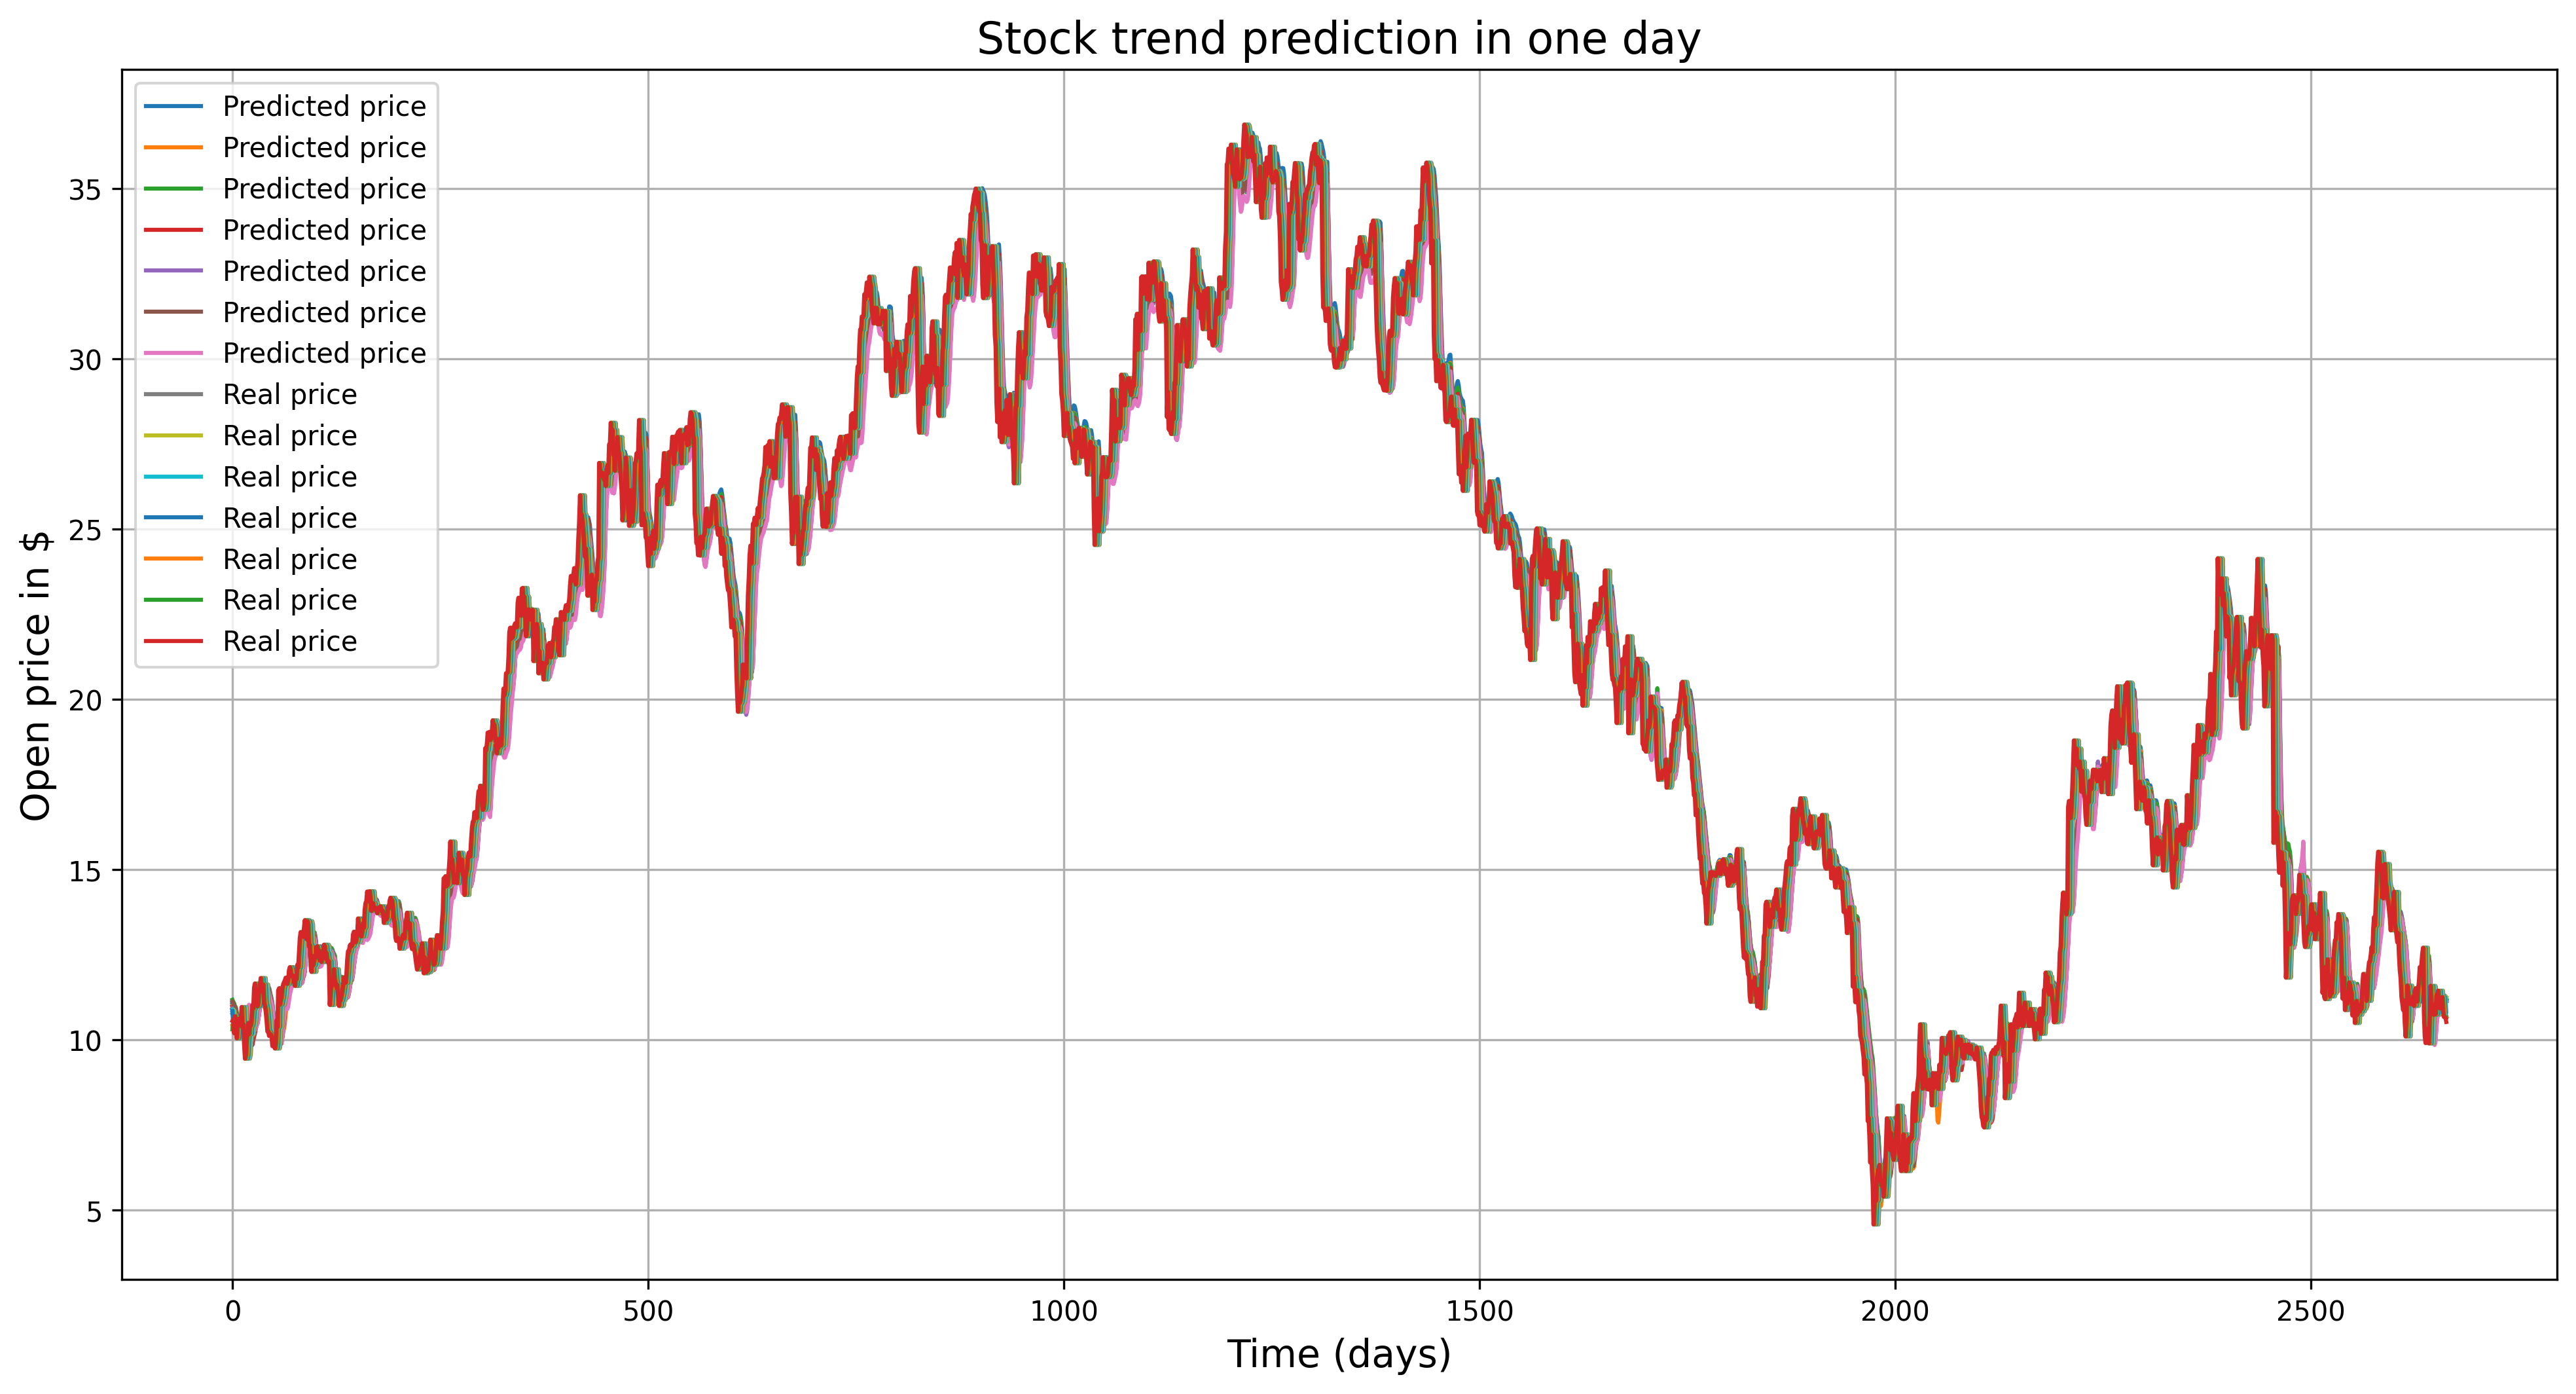

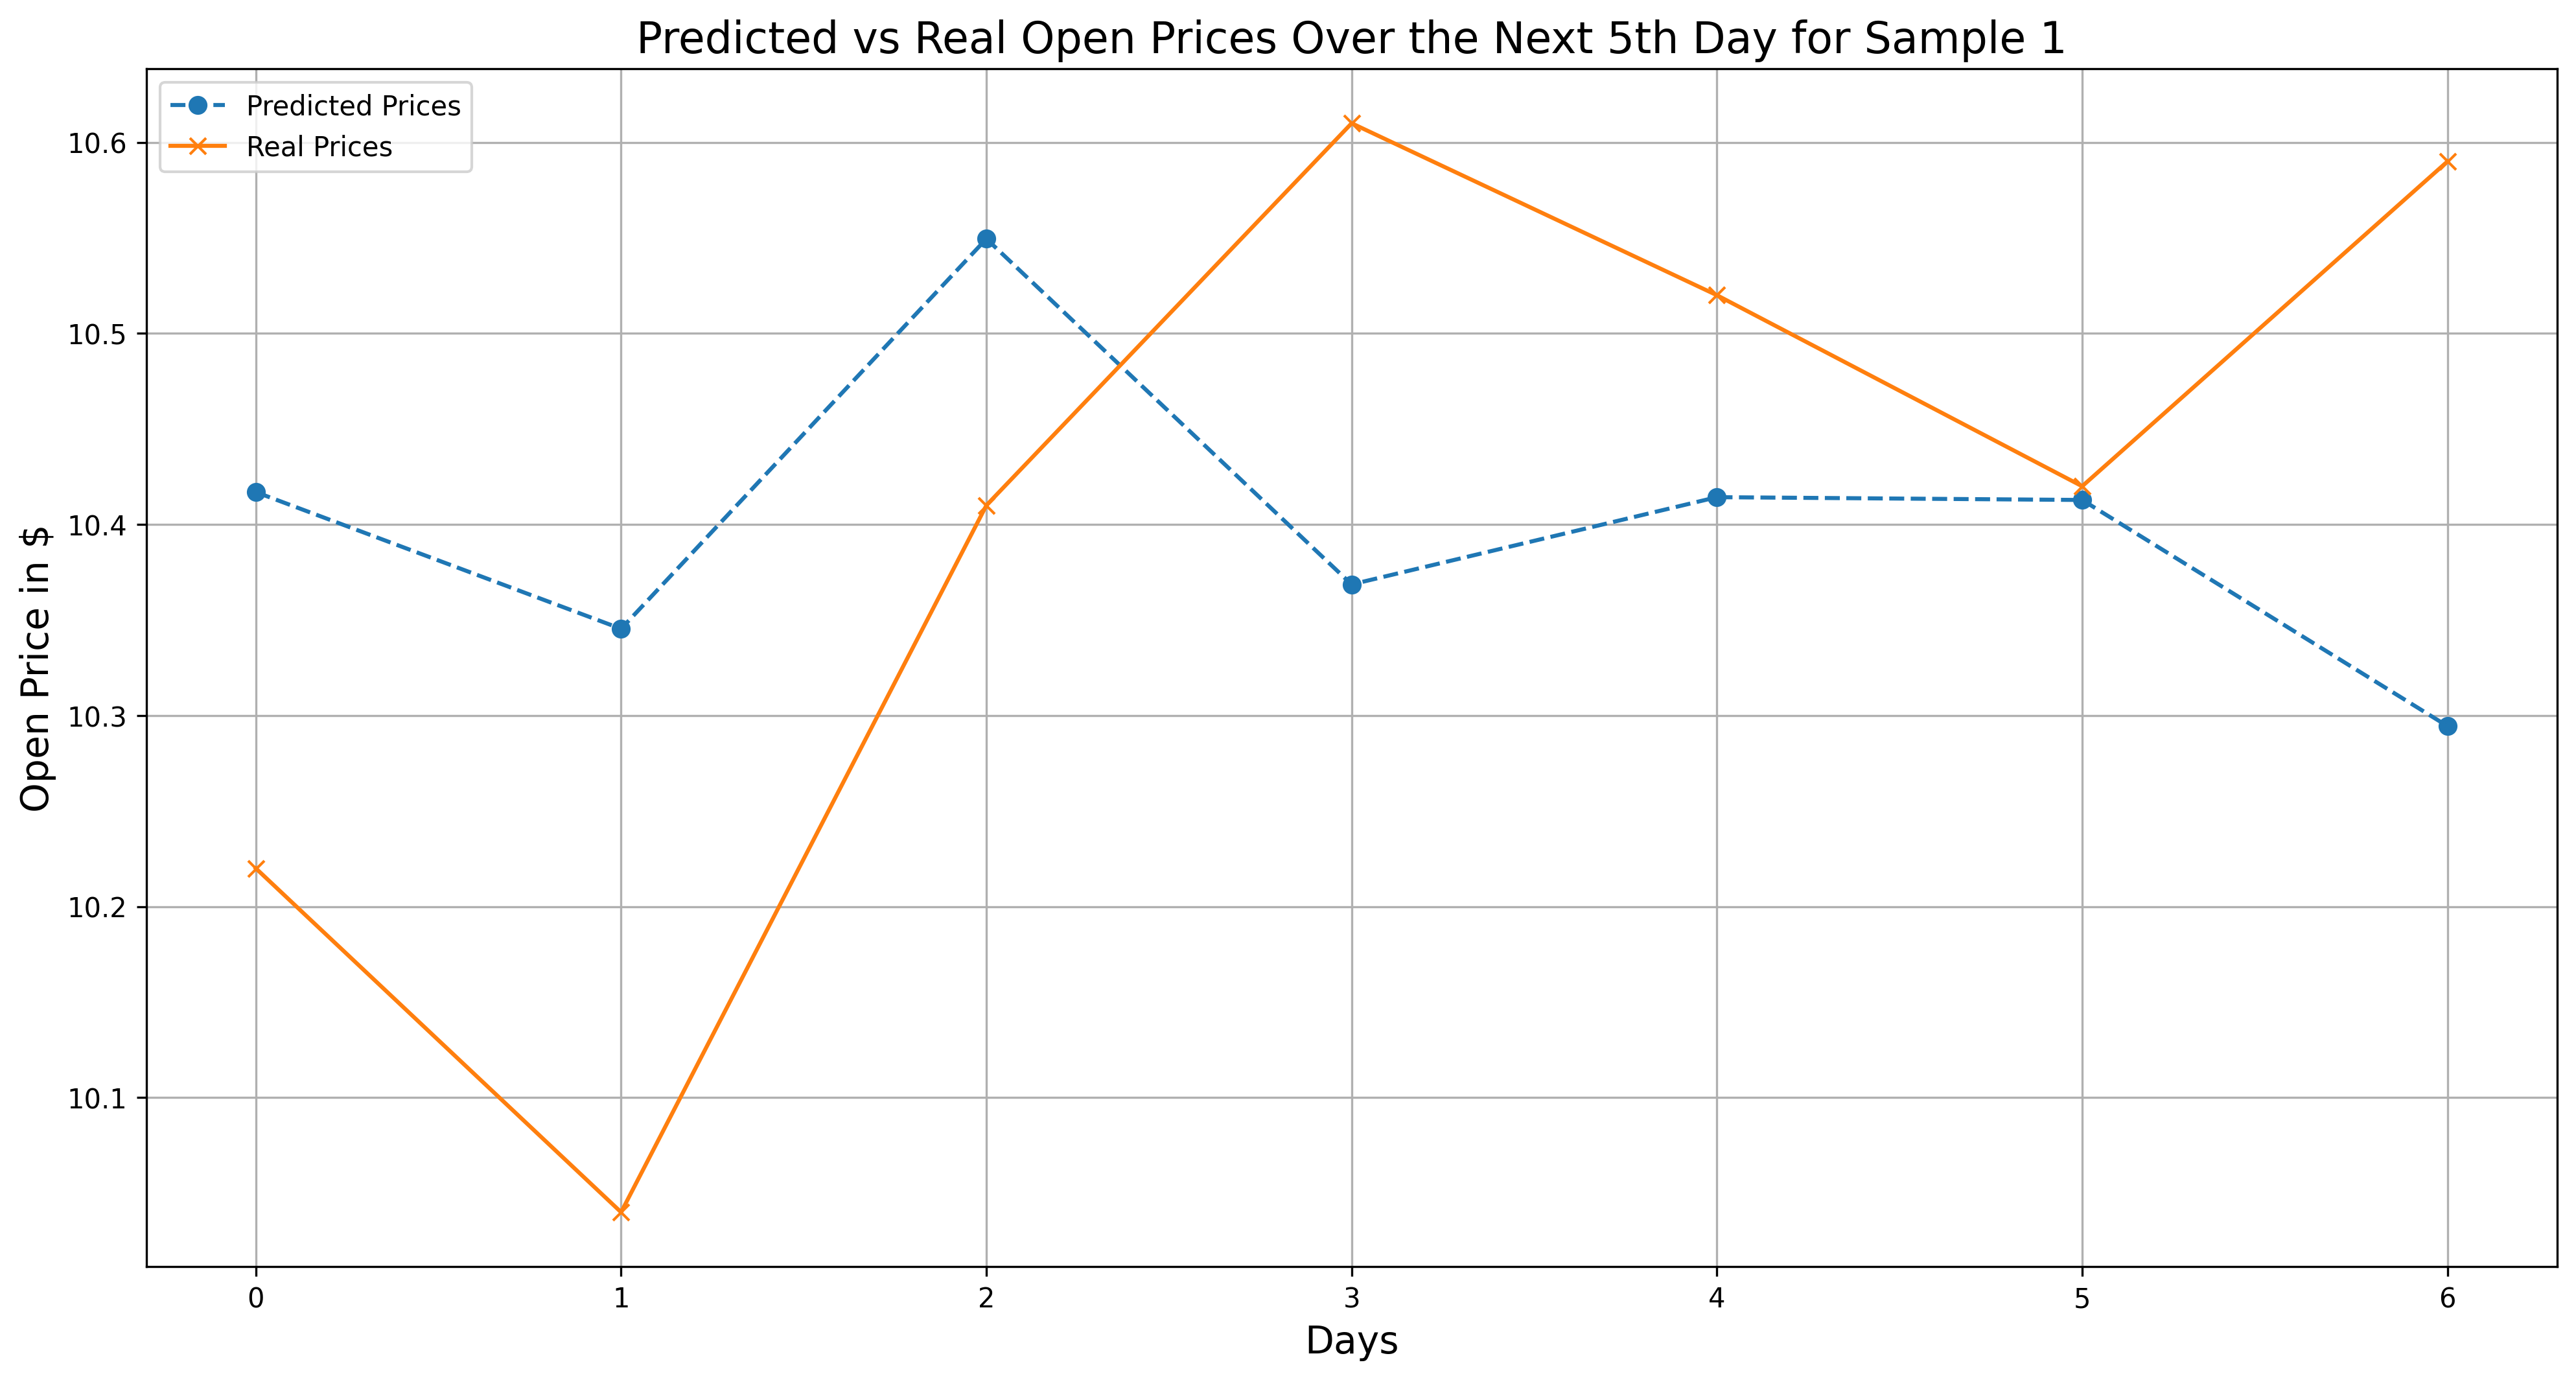

In [ ]:
plot_prediction(y_pred_denom_bigru_ts, y_test, "BiGRU")
plot_prediction_timestep(y_pred_denom_bigru_ts, y_test, "BiGRU")

In [ ]:
stop here if only want to train with time series split

SyntaxError: expected 'else' after 'if' expression (<ipython-input-21-5020a814a012>, line 1)

# normal train

In [ ]:
splited_sets = pp.split_data(X_data, y_data)
X_train = splited_sets[0]
X_val = splited_sets[1]
X_test = splited_sets[2]

y_train = splited_sets[3]
y_val = splited_sets[4]
y_test = splited_sets[5]

In [ ]:
y_train.shape

(8524, 7)

In [ ]:
y_train

array([[13.375 , 13.125 , 13.    , ..., 12.8125, 13.25  , 13.375 ],
       [13.125 , 13.    , 13.    , ..., 13.25  , 13.375 , 13.4375],
       [13.    , 13.    , 12.8125, ..., 13.375 , 13.4375, 13.3125],
       ...,
       [ 6.62  ,  6.77  ,  6.76  , ...,  6.64  ,  6.34  ,  6.48  ],
       [ 6.77  ,  6.76  ,  6.73  , ...,  6.34  ,  6.48  ,  6.37  ],
       [ 6.76  ,  6.73  ,  6.64  , ...,  6.48  ,  6.37  ,  6.22  ]])

In [ ]:
# Reshape the numpy array to fit the neural network input shape requirement
window_size = 30
X_train = X_train.reshape(X_train.shape[0], window_size, 6)
X_val = X_val.reshape(X_val.shape[0], window_size, 6)
X_test = X_test.reshape(X_test.shape[0], window_size, 6)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)
print()
print("Shape of training set: ", y_train.shape)
print("Shape of validation set: ", y_val.shape)
print("Shape of test set: ", y_test.shape)

Shape of training set:  (8524, 30, 6)
Shape of validation set:  (2131, 30, 6)
Shape of test set:  (2664, 30, 6)

Shape of training set:  (8524, 7)
Shape of validation set:  (2131, 7)
Shape of test set:  (2664, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# in this code i create 6 scaler for 6 feature, and 1 scaler for all the y data. The issue is that I should use param(scaler) by fitting x to
# transform y using that param. But now i have 6 params for x and i just need 1 param for y. so how to handle this.
# Initialize the MinMaxScaler for each feature
#y_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train)
    y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (8524, 30, 6)
Shape of scaled validation set:  (2131, 30, 6)
Shape of scaled test set:  (2664, 30, 6)

Shape of scales training label  (8524, 7)
Shape of scales validation label  (2131, 7)
Shape of scales test label  (2664, 7)


## train

In [ ]:
# Compile and train Convo1D
optimizer = Nadam(learning_rate=0.001)
compile(model_1d, optimizer)
callbacks = get_callbacks(file_path='model_1d.keras')
history_1d = train_history(model_1d,batch_size=2048, epochs=30, callbacks=callbacks,
                           X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                           validation_data=(X_val_norm, y_val_norm))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - loss: 0.1028 - mae: 0.2391 - val_loss: 0.0105 - val_mae: 0.0719 - learning_rate: 0.0010
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 0.0511 - mae: 0.1496 - val_loss: 0.0050 - val_mae: 0.0575 - learning_rate: 0.0010
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.0204 - mae: 0.1069 - val_loss: 0.0048 - val_mae: 0.0619 - learning_rate: 0.0010
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - loss: 0.0087 - mae: 0.0758 - val_loss: 0.0016 - val_mae: 0.0300 - learning_rate: 0.0010
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.0018 - mae: 0.0323 - val_loss: 0.0019 - val_mae: 0.0351 - learning_rate: 0.0010
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.0014 - mae: 0.0272 - val_loss: 0.0016 - val_mae: 0.0324 - learning_rate: 0.0010
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.0011 - mae: 0.0222 - val_loss: 0.0010 - val_mae: 0.0233 - learning_rate: 0.0010
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Compile and train BiLSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_bilstm, optimizer)
callbacks = get_callbacks(file_path='model_bilstm.keras')
history_bilstm = train_history(model_bilstm, batch_size=2048, epochs=30, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 8s/step - loss: 0.1595 - mae: 0.2951 - val_loss: 0.0311 - val_mae: 0.1476 - learning_rate: 0.0100
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 79s 7s/step - loss: 0.1532 - mae: 0.2894 - val_loss: 0.0688 - val_mae: 0.2470 - learning_rate: 0.0100
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - loss: 0.0589 - mae: 0.1877 - val_loss: 0.0064 - val_mae: 0.0686 - learning_rate: 0.0100
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - loss: 0.0046 - mae: 0.0495 - val_loss: 0.0044 - val_mae: 0.0536 - learning_rate: 0.0100
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - loss: 0.0144 - mae: 0.0854 - val_loss: 0.0041 - val_mae: 0.0523 - learning_rate: 0.0100
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - loss: 0.0032 - mae: 0.0402 - val_loss: 0.0013 - val_mae: 0.0268 - learning_rate: 0.0100
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - loss: 0.0021 - mae: 0.0317 - val_loss: 0.0011 - val_mae: 0.0255 - learning_rate: 0.0100
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# COmpile and train BiGRU
from tensorflow.keras.optimizers import Adam, SGD, Nadam
optimizer = Nadam(learning_rate=0.001)
compile(model_bigru, optimizer=optimizer)
callbacks = get_callbacks(file_path='model_bigru.keras')
history_gru = train_history(model_bigru,batch_size=2048, epochs=30, callbacks=callbacks,
                            X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                            validation_data=(X_val_norm, y_val_norm))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - loss: 0.0603 - mae: 0.1665 - val_loss: 0.0026 - val_mae: 0.0462 - learning_rate: 0.0010
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - loss: 0.0019 - mae: 0.0352 - val_loss: 0.0011 - val_mae: 0.0277 - learning_rate: 0.0010
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - loss: 0.0012 - mae: 0.0244 - val_loss: 7.1995e-04 - val_mae: 0.0202 - learning_rate: 0.0010
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - loss: 0.0011 - mae: 0.0220 - val_loss: 5.0265e-04 - val_mae: 0.0167 - learning_rate: 0.0010
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - loss: 0.0011 - mae: 0.0222 - val_loss: 4.8912e-04 - val_mae: 0.0163 - learning_rate: 0.0010
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - loss: 9.1120e-04 - mae: 0.0197 - val_loss: 4.8471e-04 - val_mae: 0.0164 - learning_rate: 0.0010
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - loss: 8.5144e-04 - mae: 0.0191 - val_loss: 4.8288e-04 - val_mae: 0.0162 - learning_rate: 0.0010
Epoch 

##plot performance

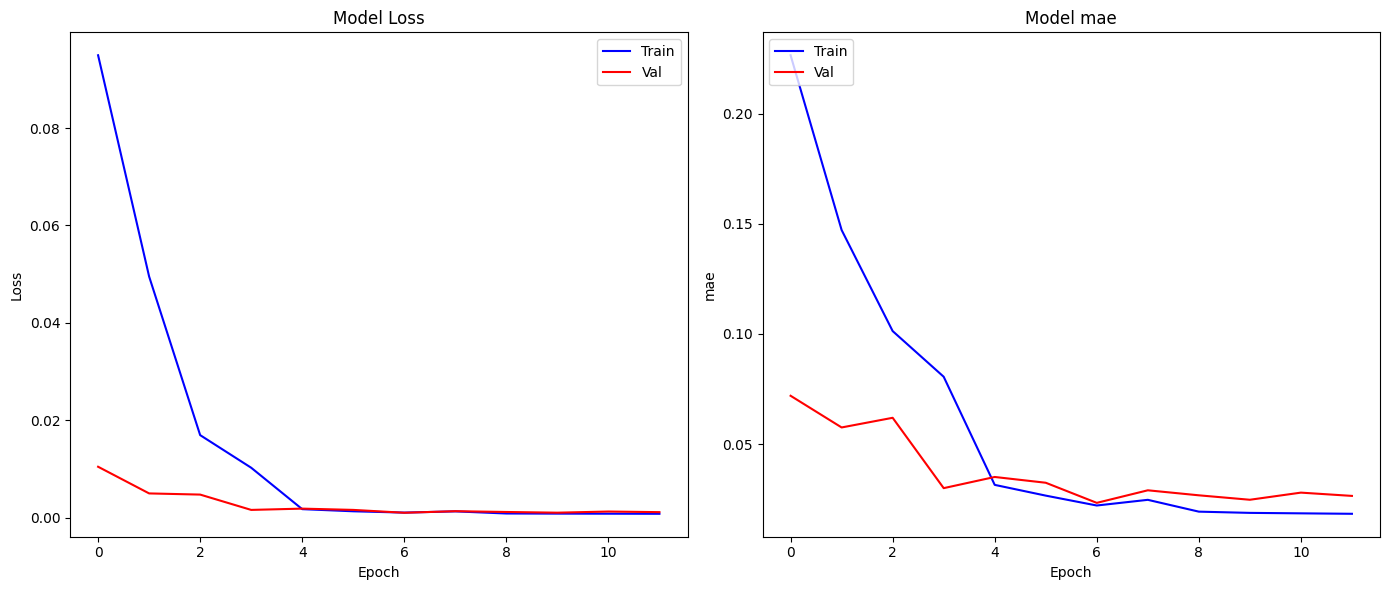

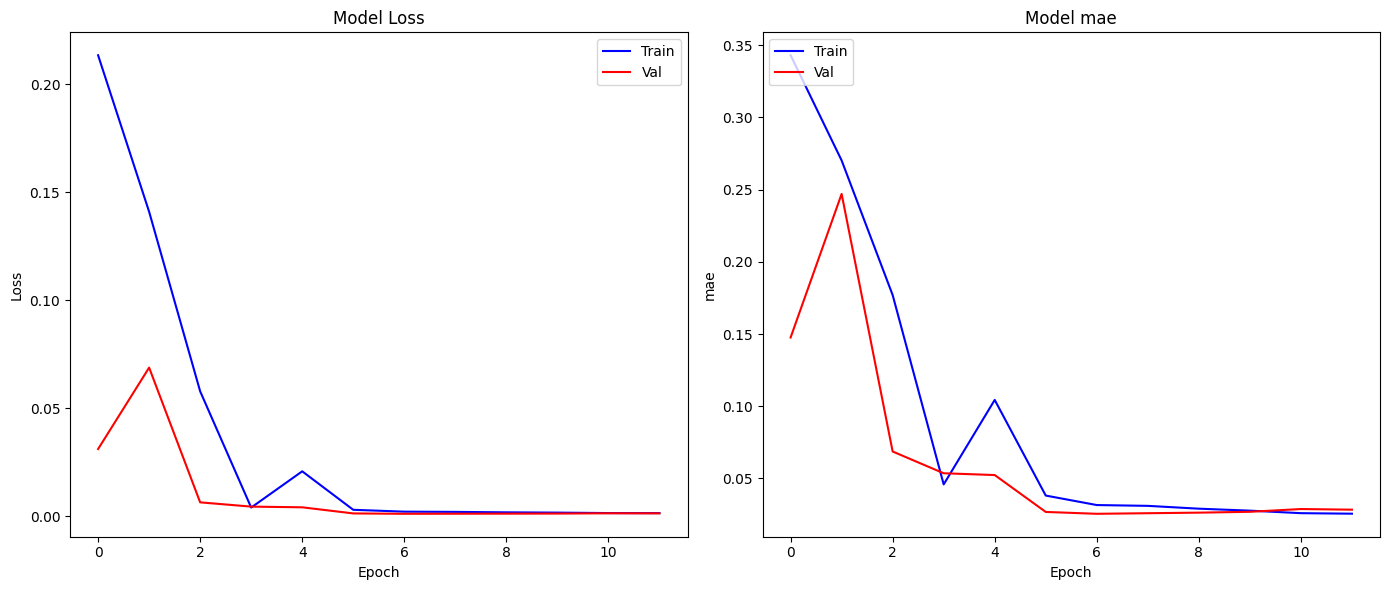

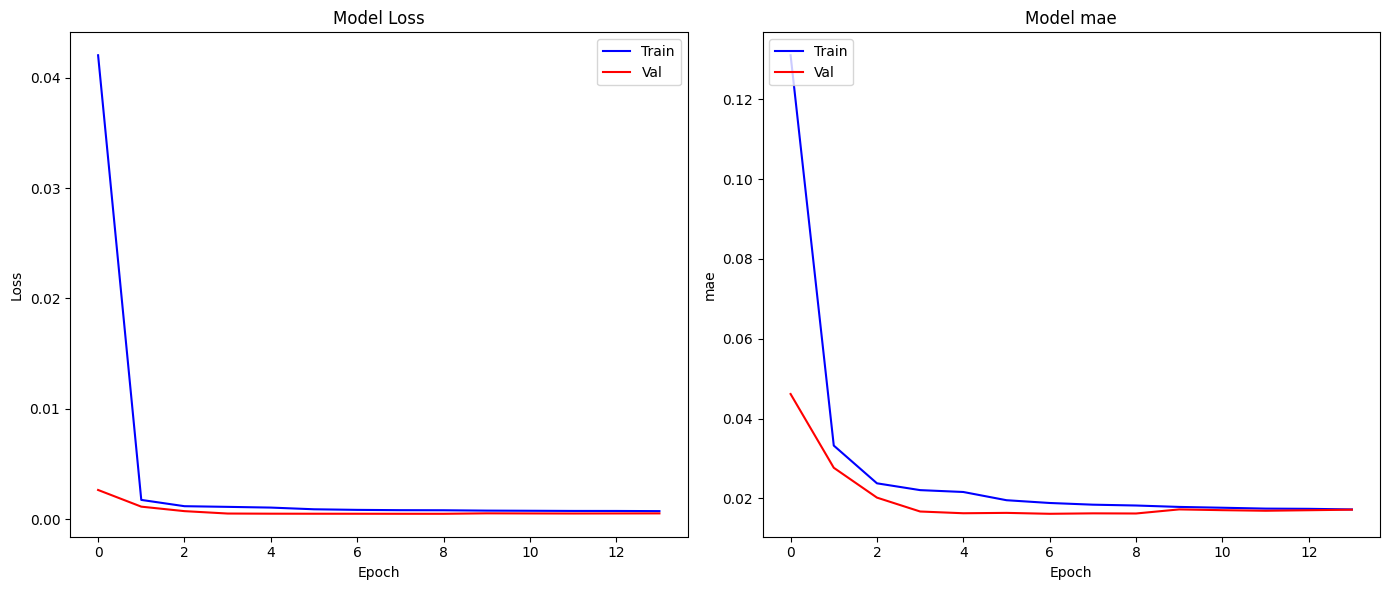

In [ ]:
plot_performance(history_1d)
plot_performance(history_bilstm)
plot_performance(history_gru)

## Evaluation

In [ ]:
print("========Convo1d===========")
model_1d = get_model_n_evaluate("/content/model_1d.keras", X_test_norm, y_test_norm)
y_pred_denorm_1d = get_reverse_prediction(model_1d, X_test_norm, y_scaler)
print()

print("=========BiLSTM===========")
model_bilstm = get_model_n_evaluate("/content/model_bilstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_bilstm = get_reverse_prediction(model_bilstm, X_test_norm, y_scaler)
print()

print("=========BiGRU===========")
model_bigru = get_model_n_evaluate("/content/model_bigru.keras", X_test_norm, y_test_norm)
y_pred_denorm_bigru = get_reverse_prediction(model_bigru, X_test_norm, y_scaler)

========Convo1d===========
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.4070e-04 - mae: 0.0217
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0010174793424084783, mae = 0.02415703795850277
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
MSE on the test set:  0.0010174791865574472
Shape of denormalized training set:  (2664, 7)

=========BiLSTM===========
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 9.6017e-04 - mae: 0.0245
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0010823782067745924, mae = 0.02580825425684452
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step
MSE on the test set:  0.0010823780537523669
Shape of denormalized training set:  (2664, 7)

=========BiGRU===========
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 3.6440e-04 - mae: 0.0148
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0004034001613035798, mae = 0.015572590753436089
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step
MSE on the test set:  0.0004034000637053367
Shape of d

In [ ]:
print(y_test_norm.shape)
print(y_pred_denorm_1d.shape)
print(y_scaler.inverse_transform(y_test_norm).shape)

(2664, 7)
(2664, 7)
(2664, 7)


In [ ]:
#convo1d: 0.00047 0.0167
#lstm: 0.00036 0.014

## viz prediction

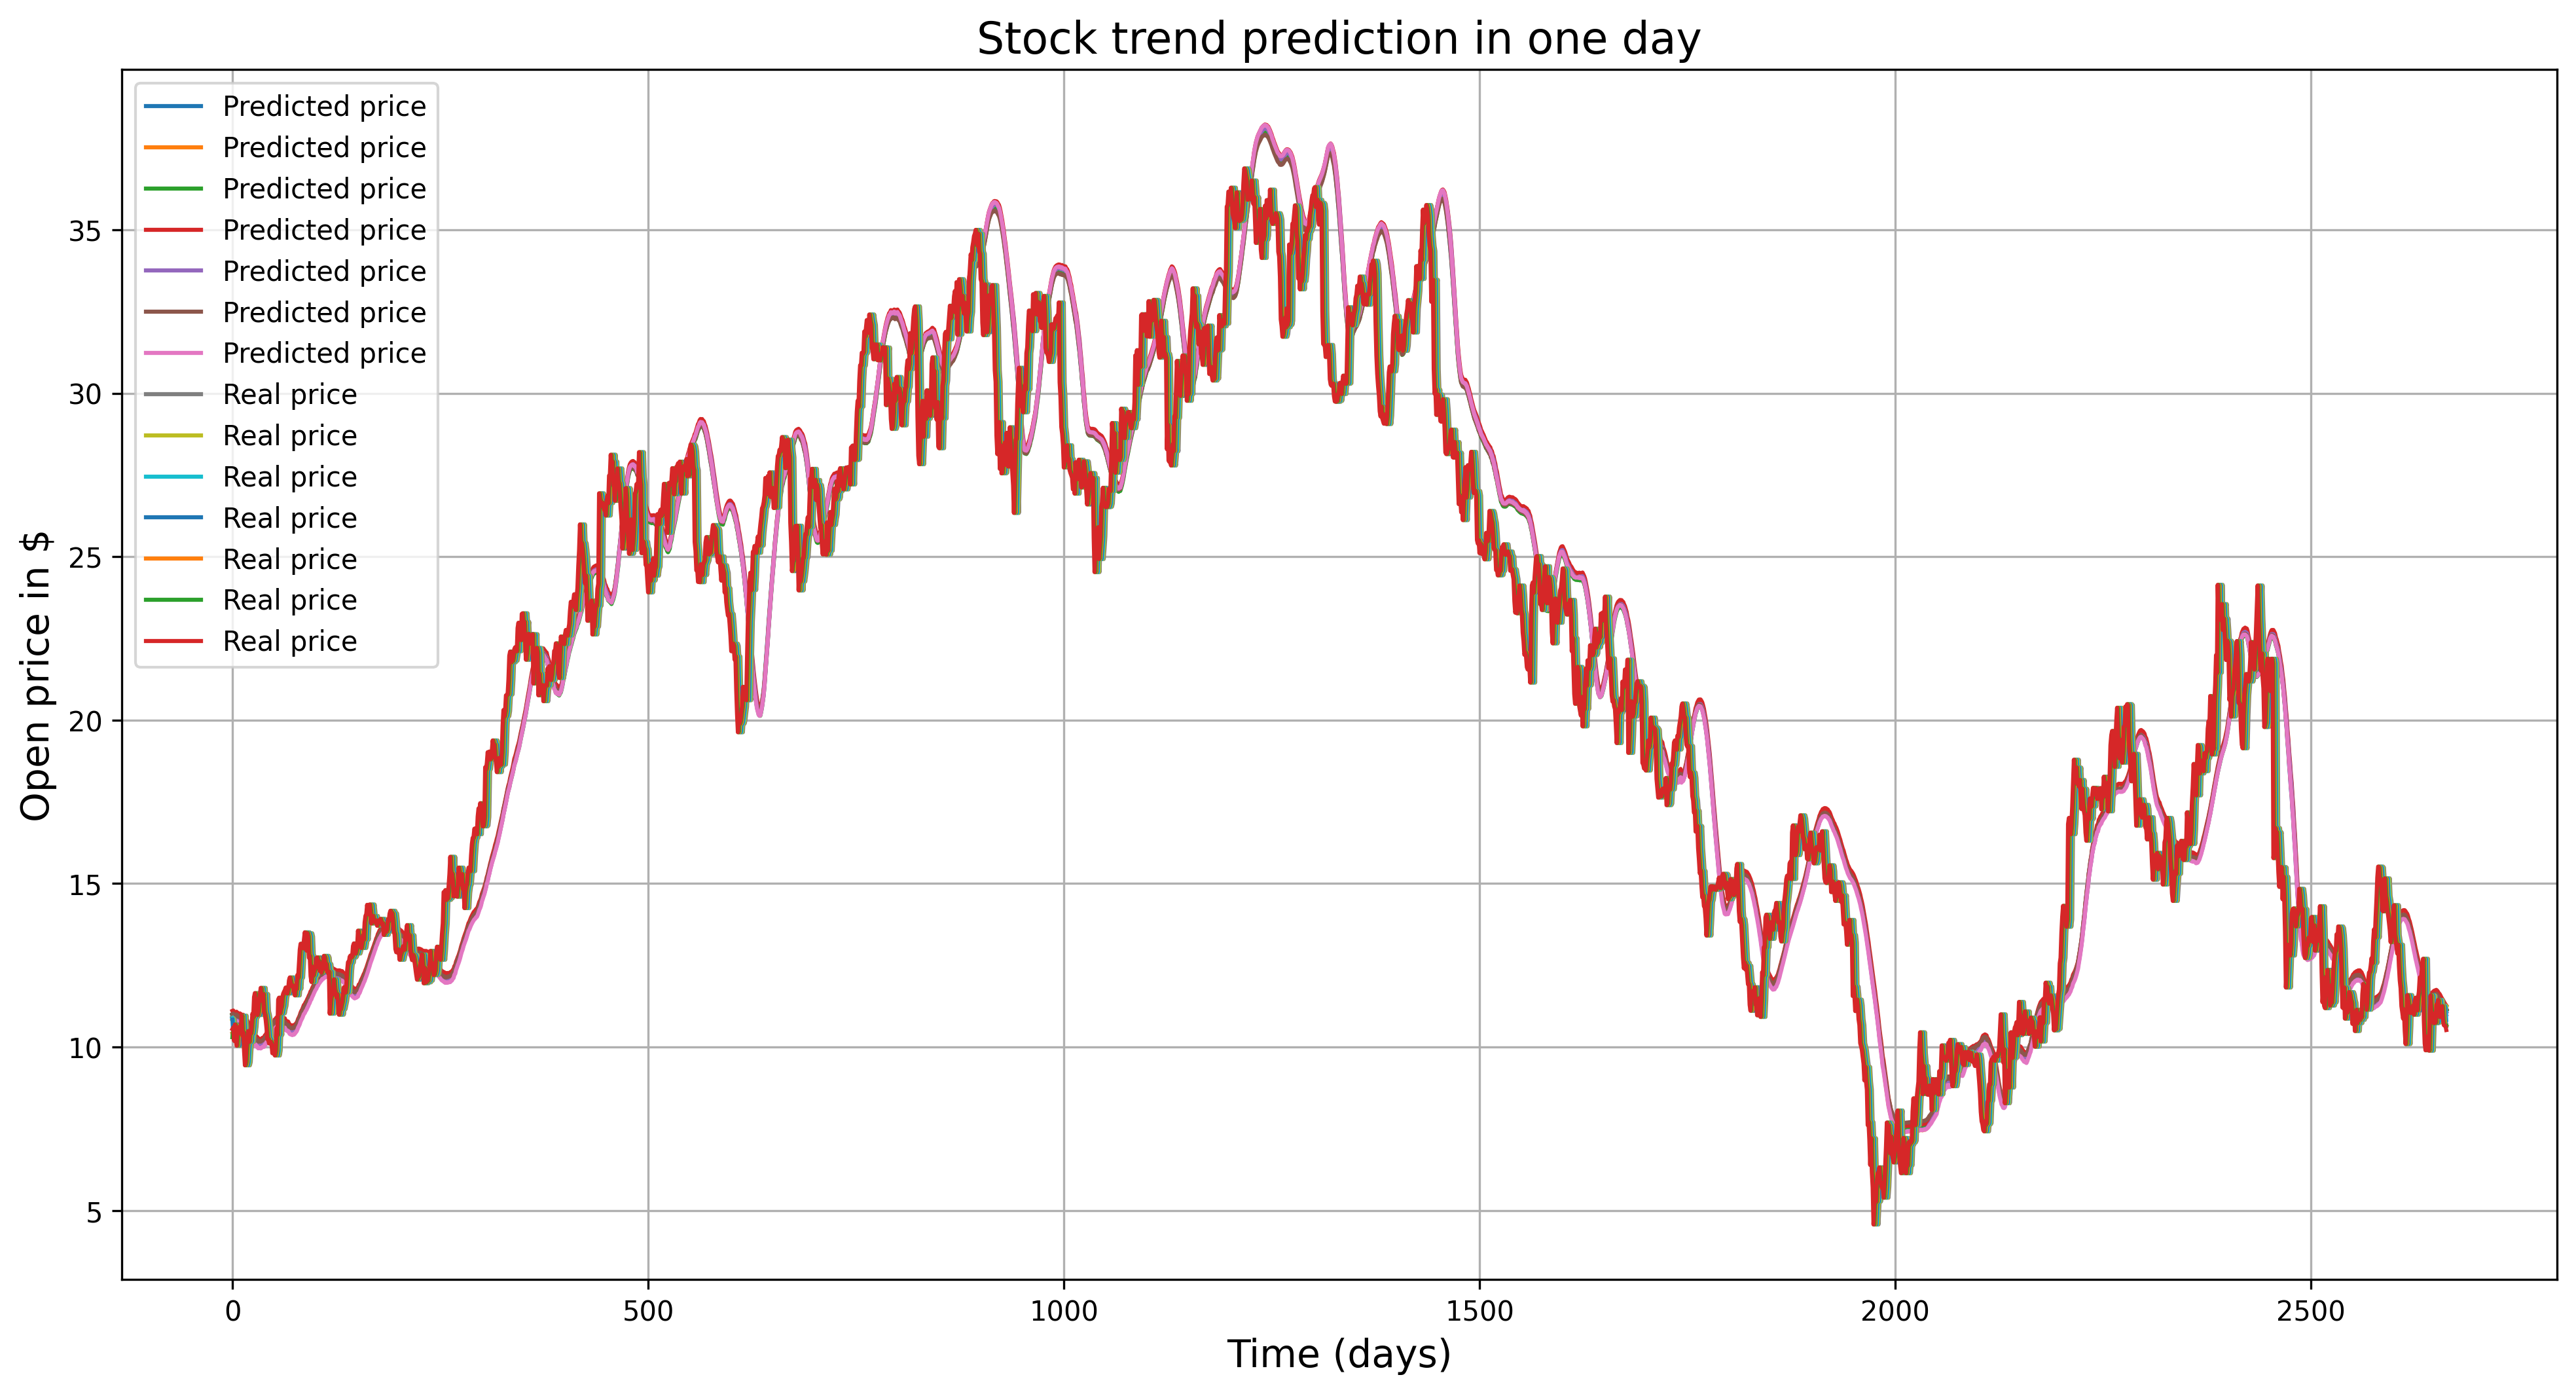

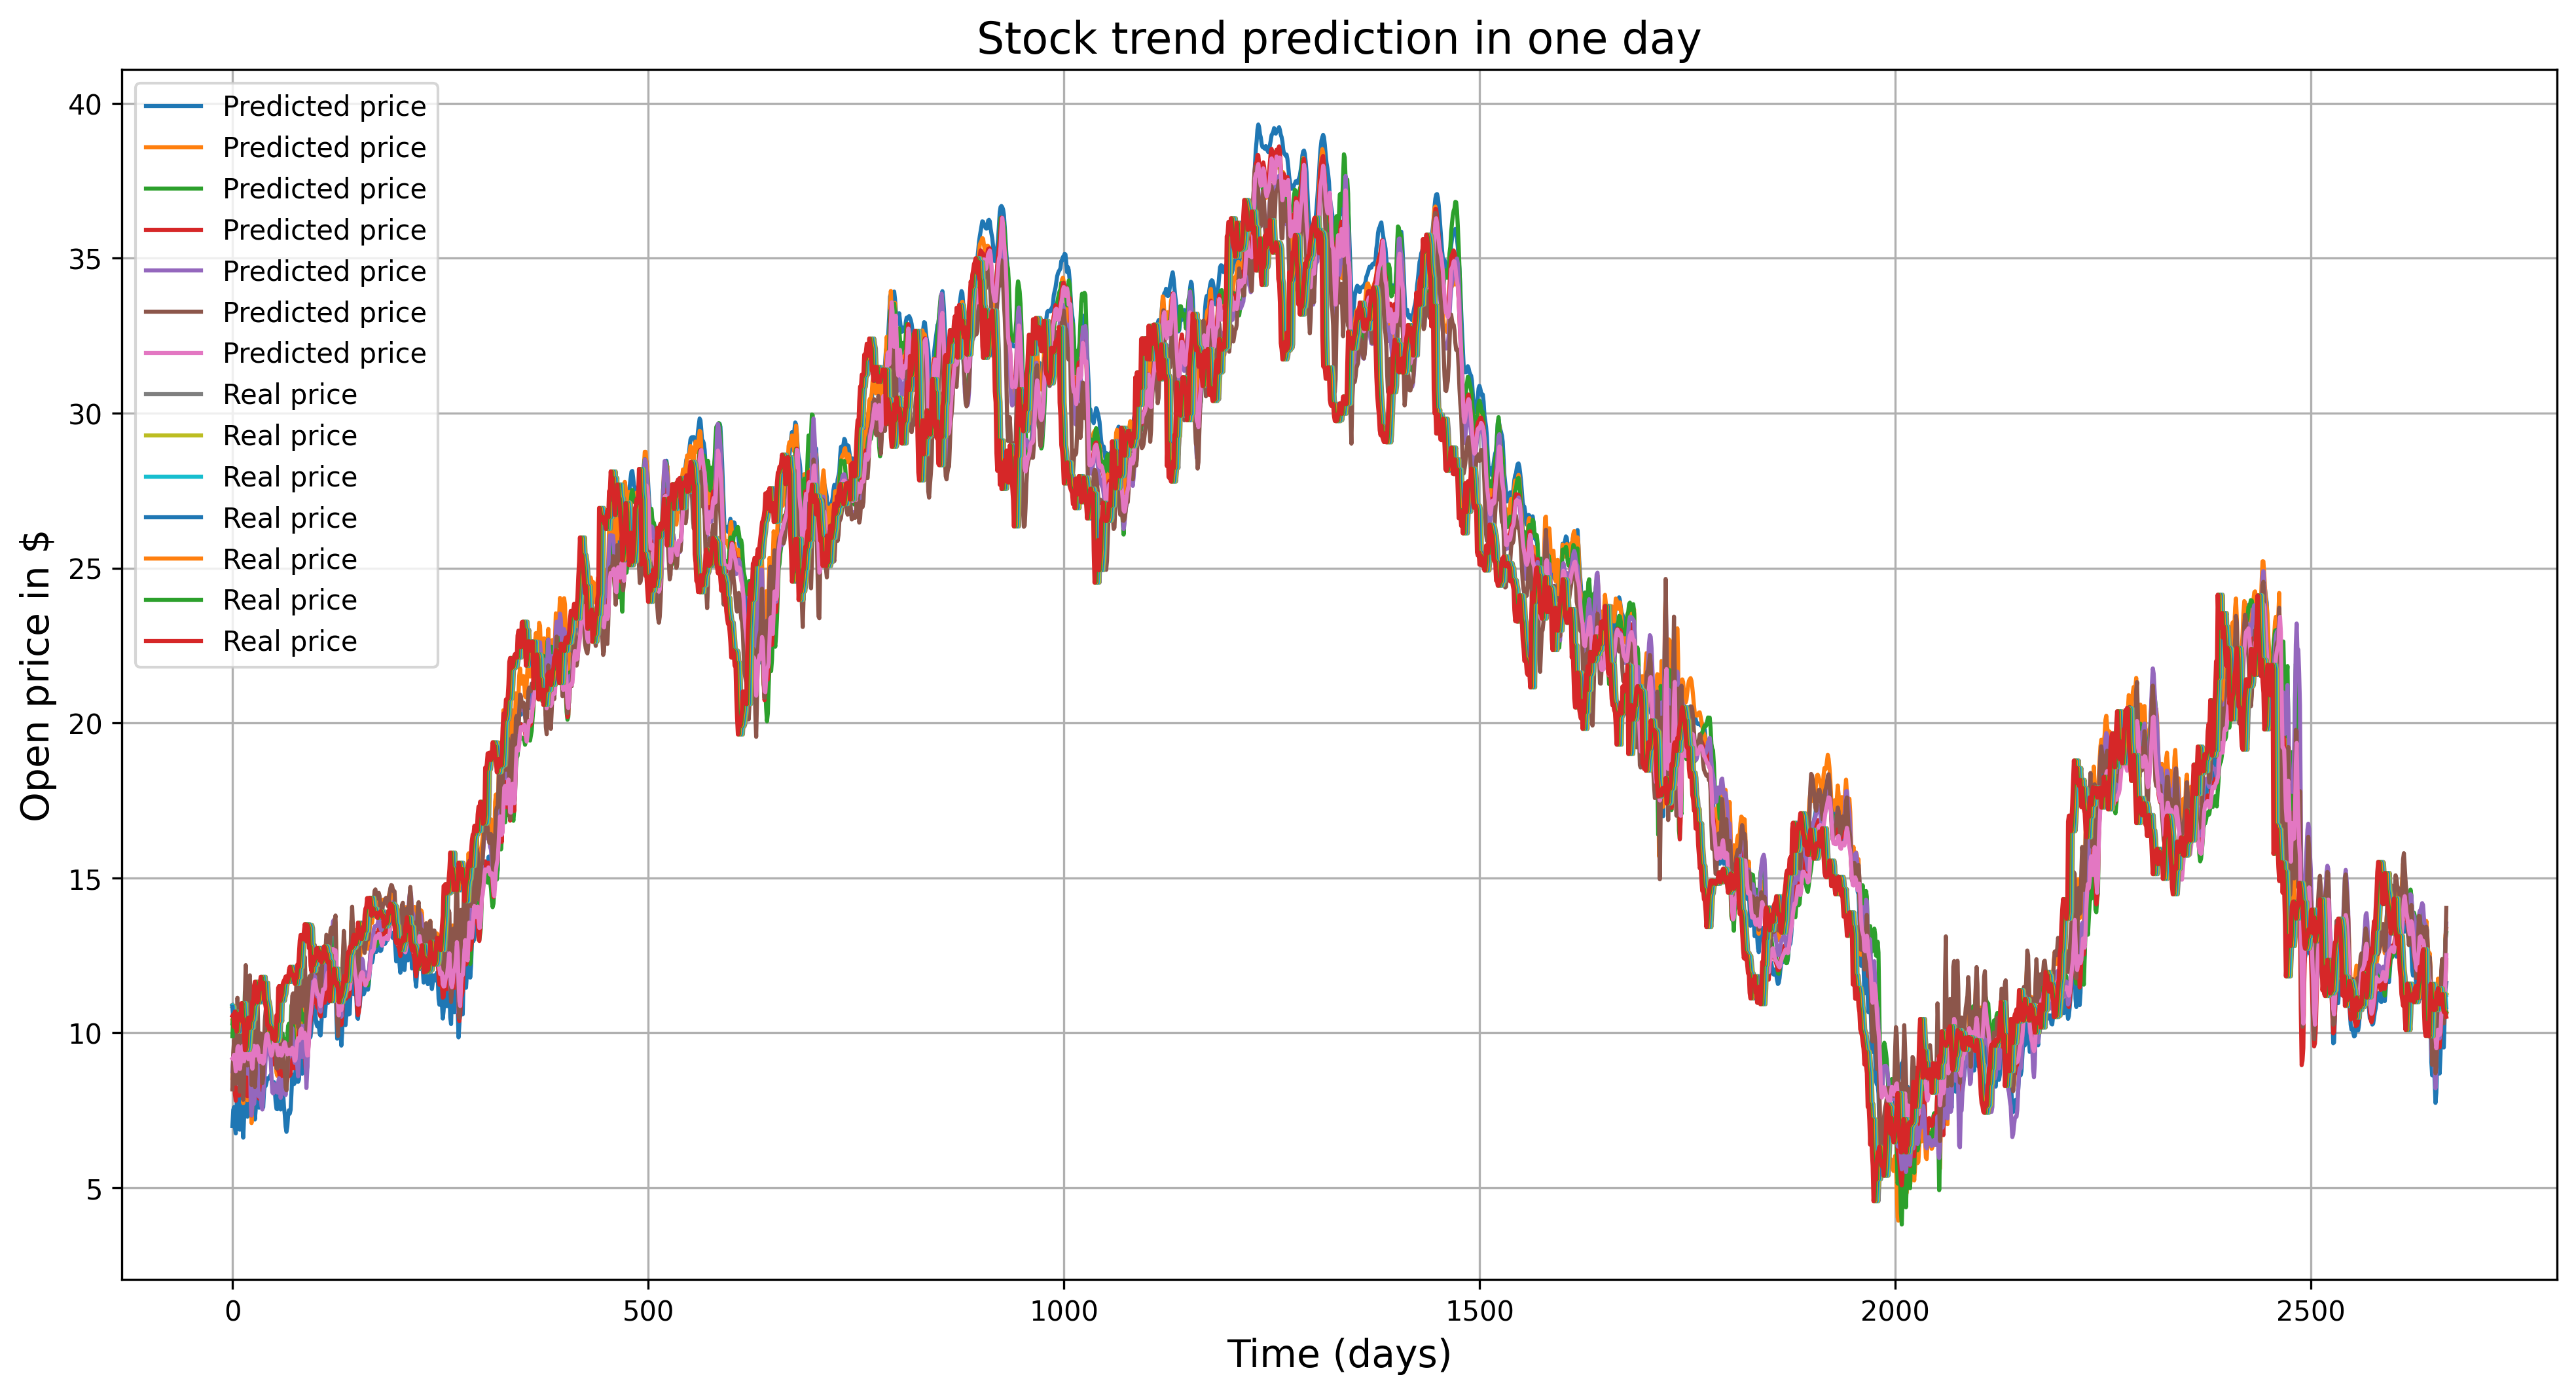

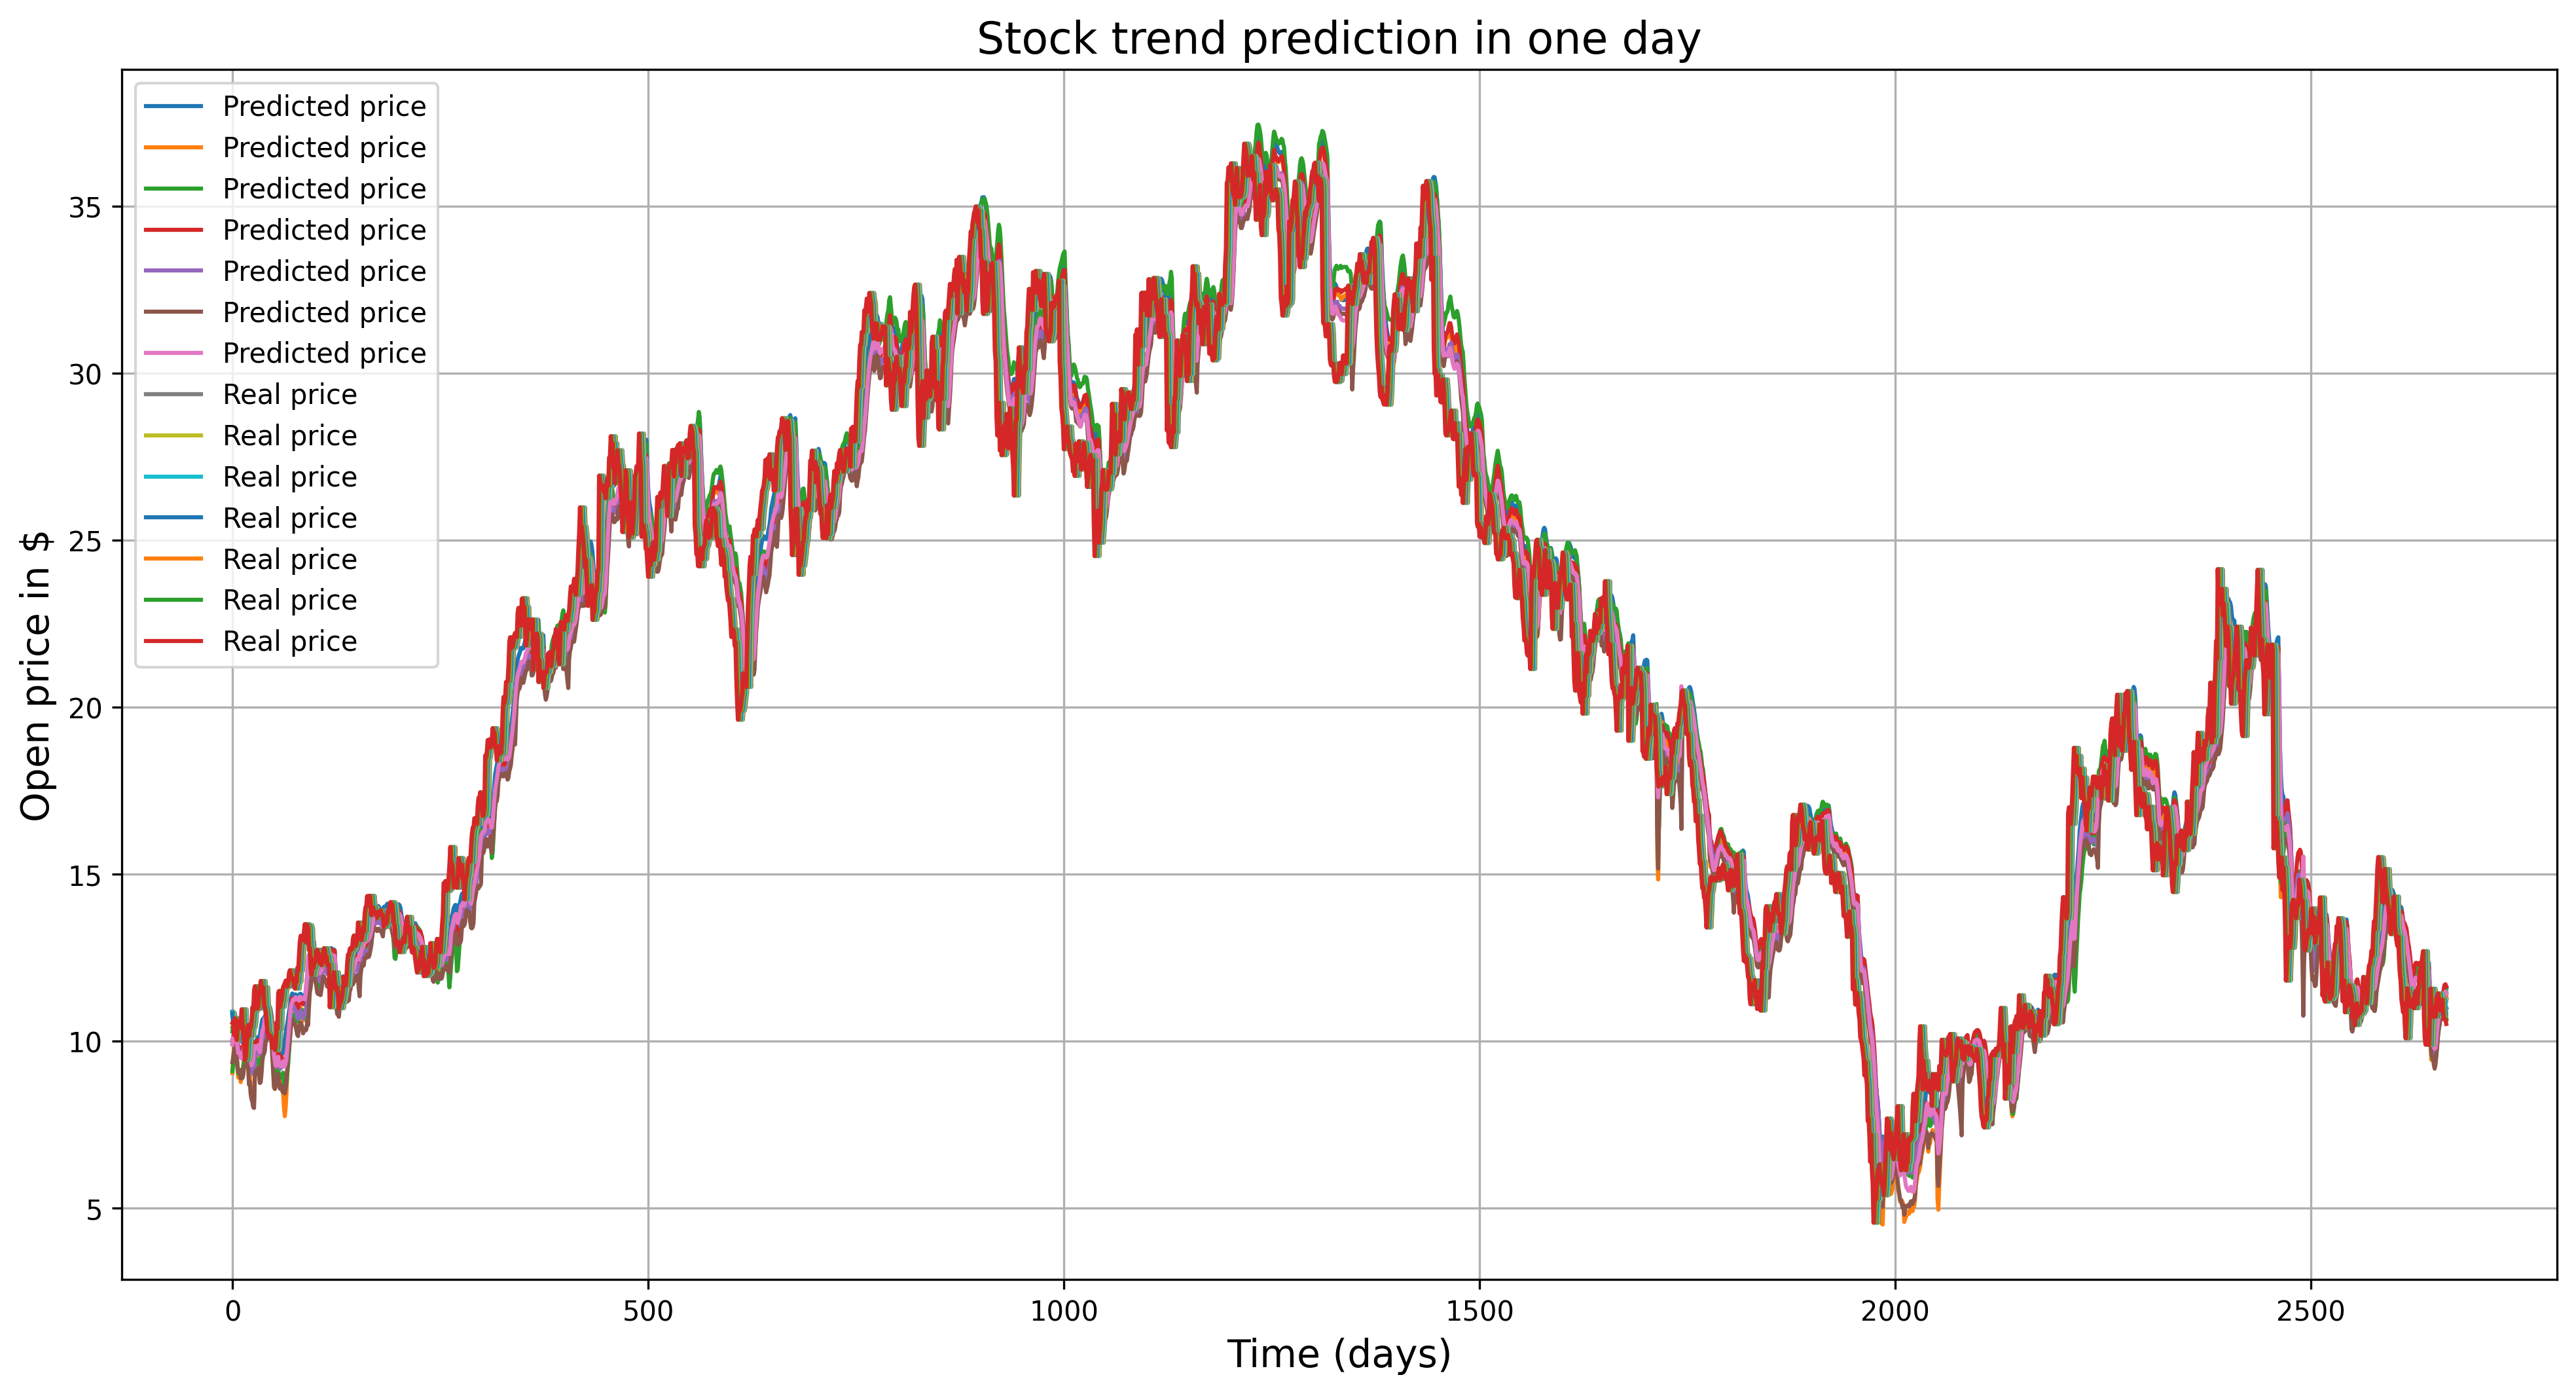

In [ ]:
plot_prediction(y_pred_denorm_1d, y_test, "Convo1D")
plot_prediction(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction(y_pred_denorm_bigru, y_test, "BiGRU")

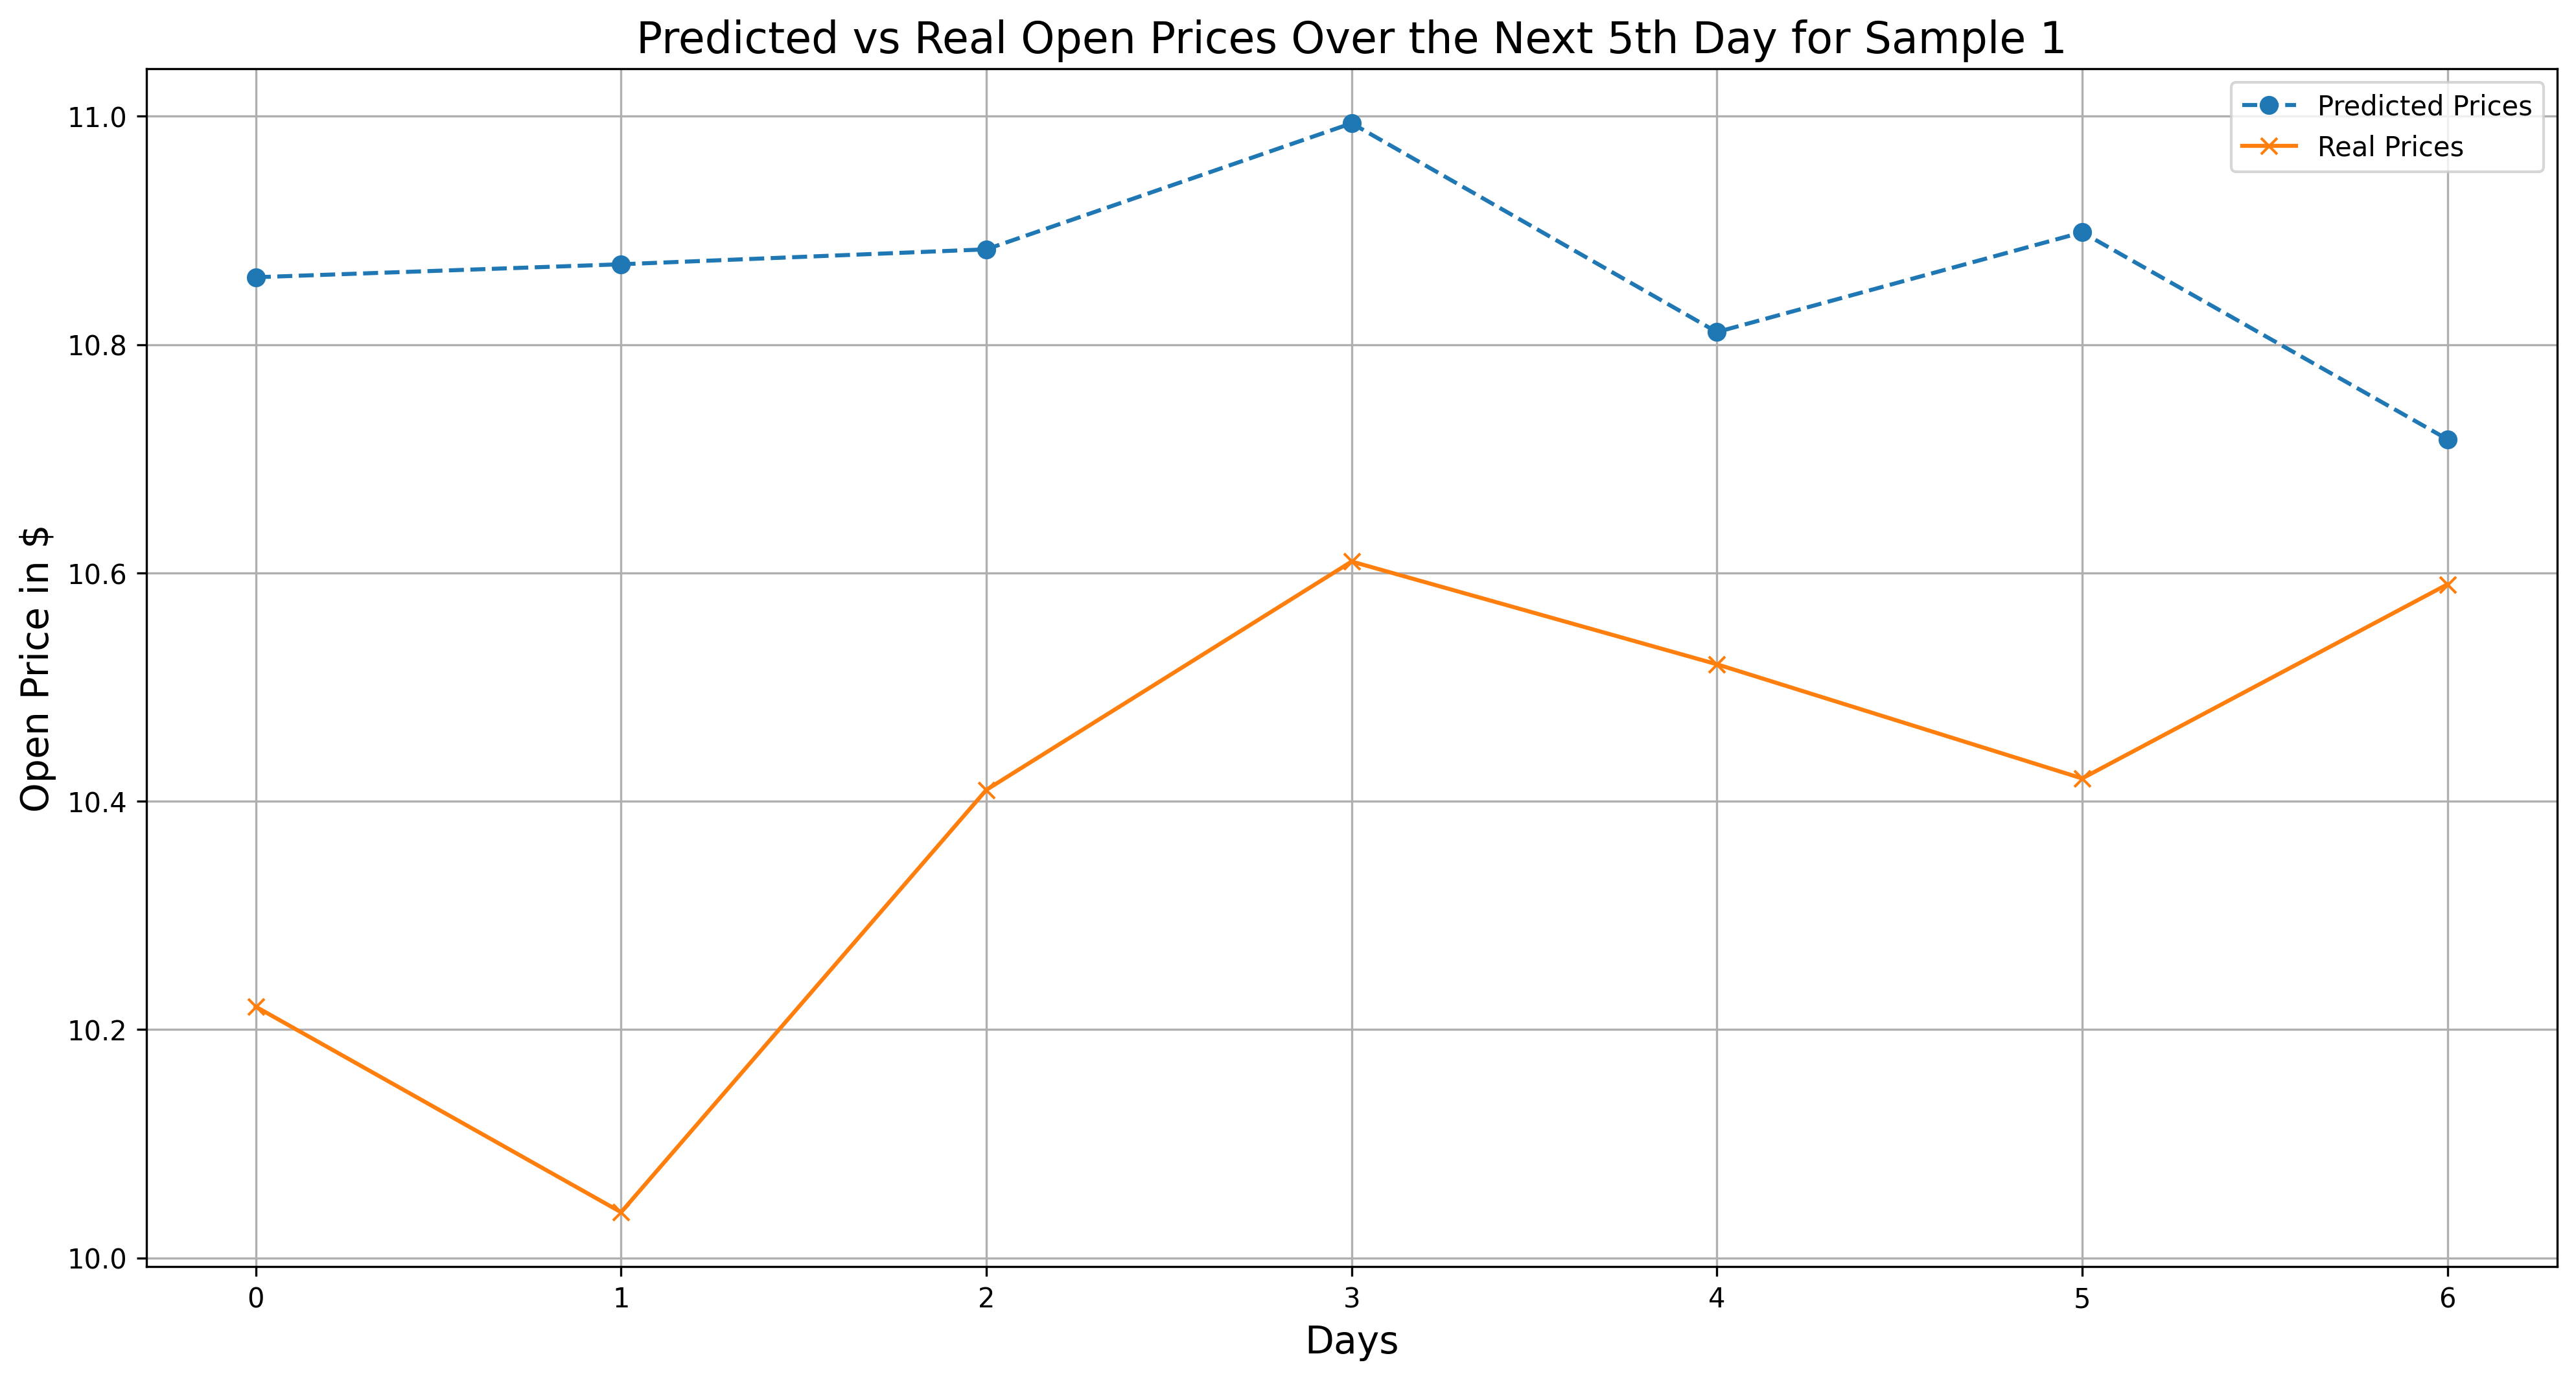

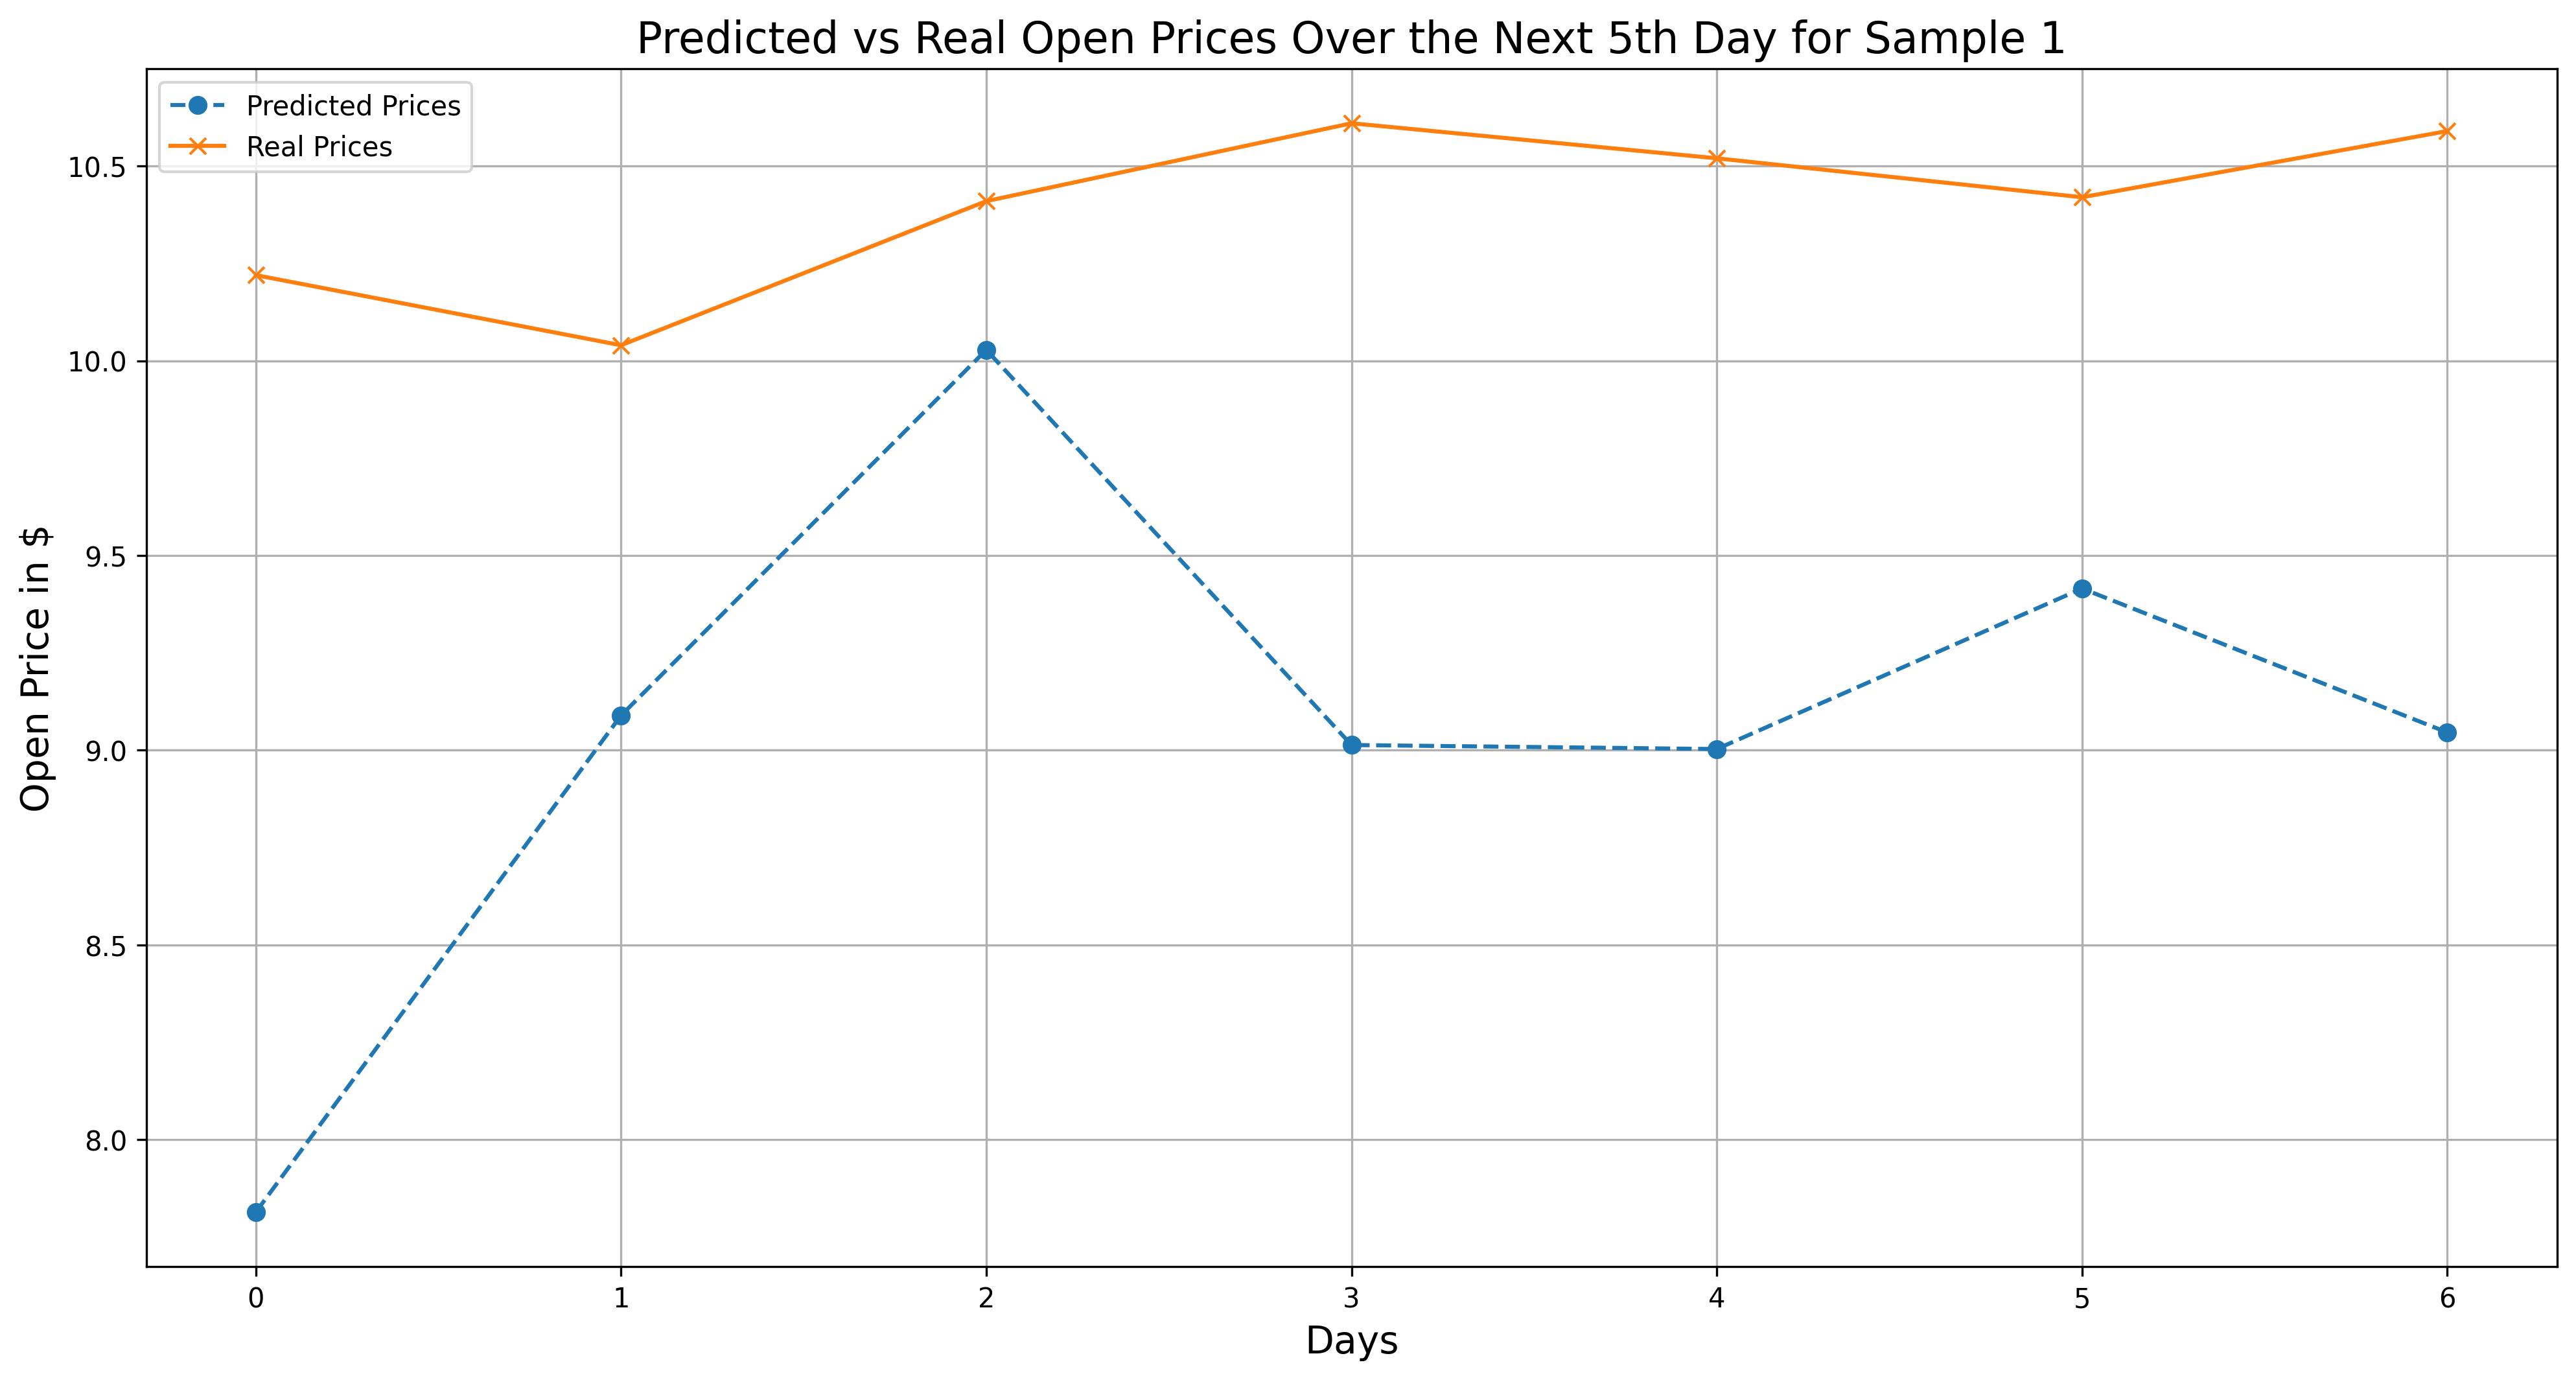

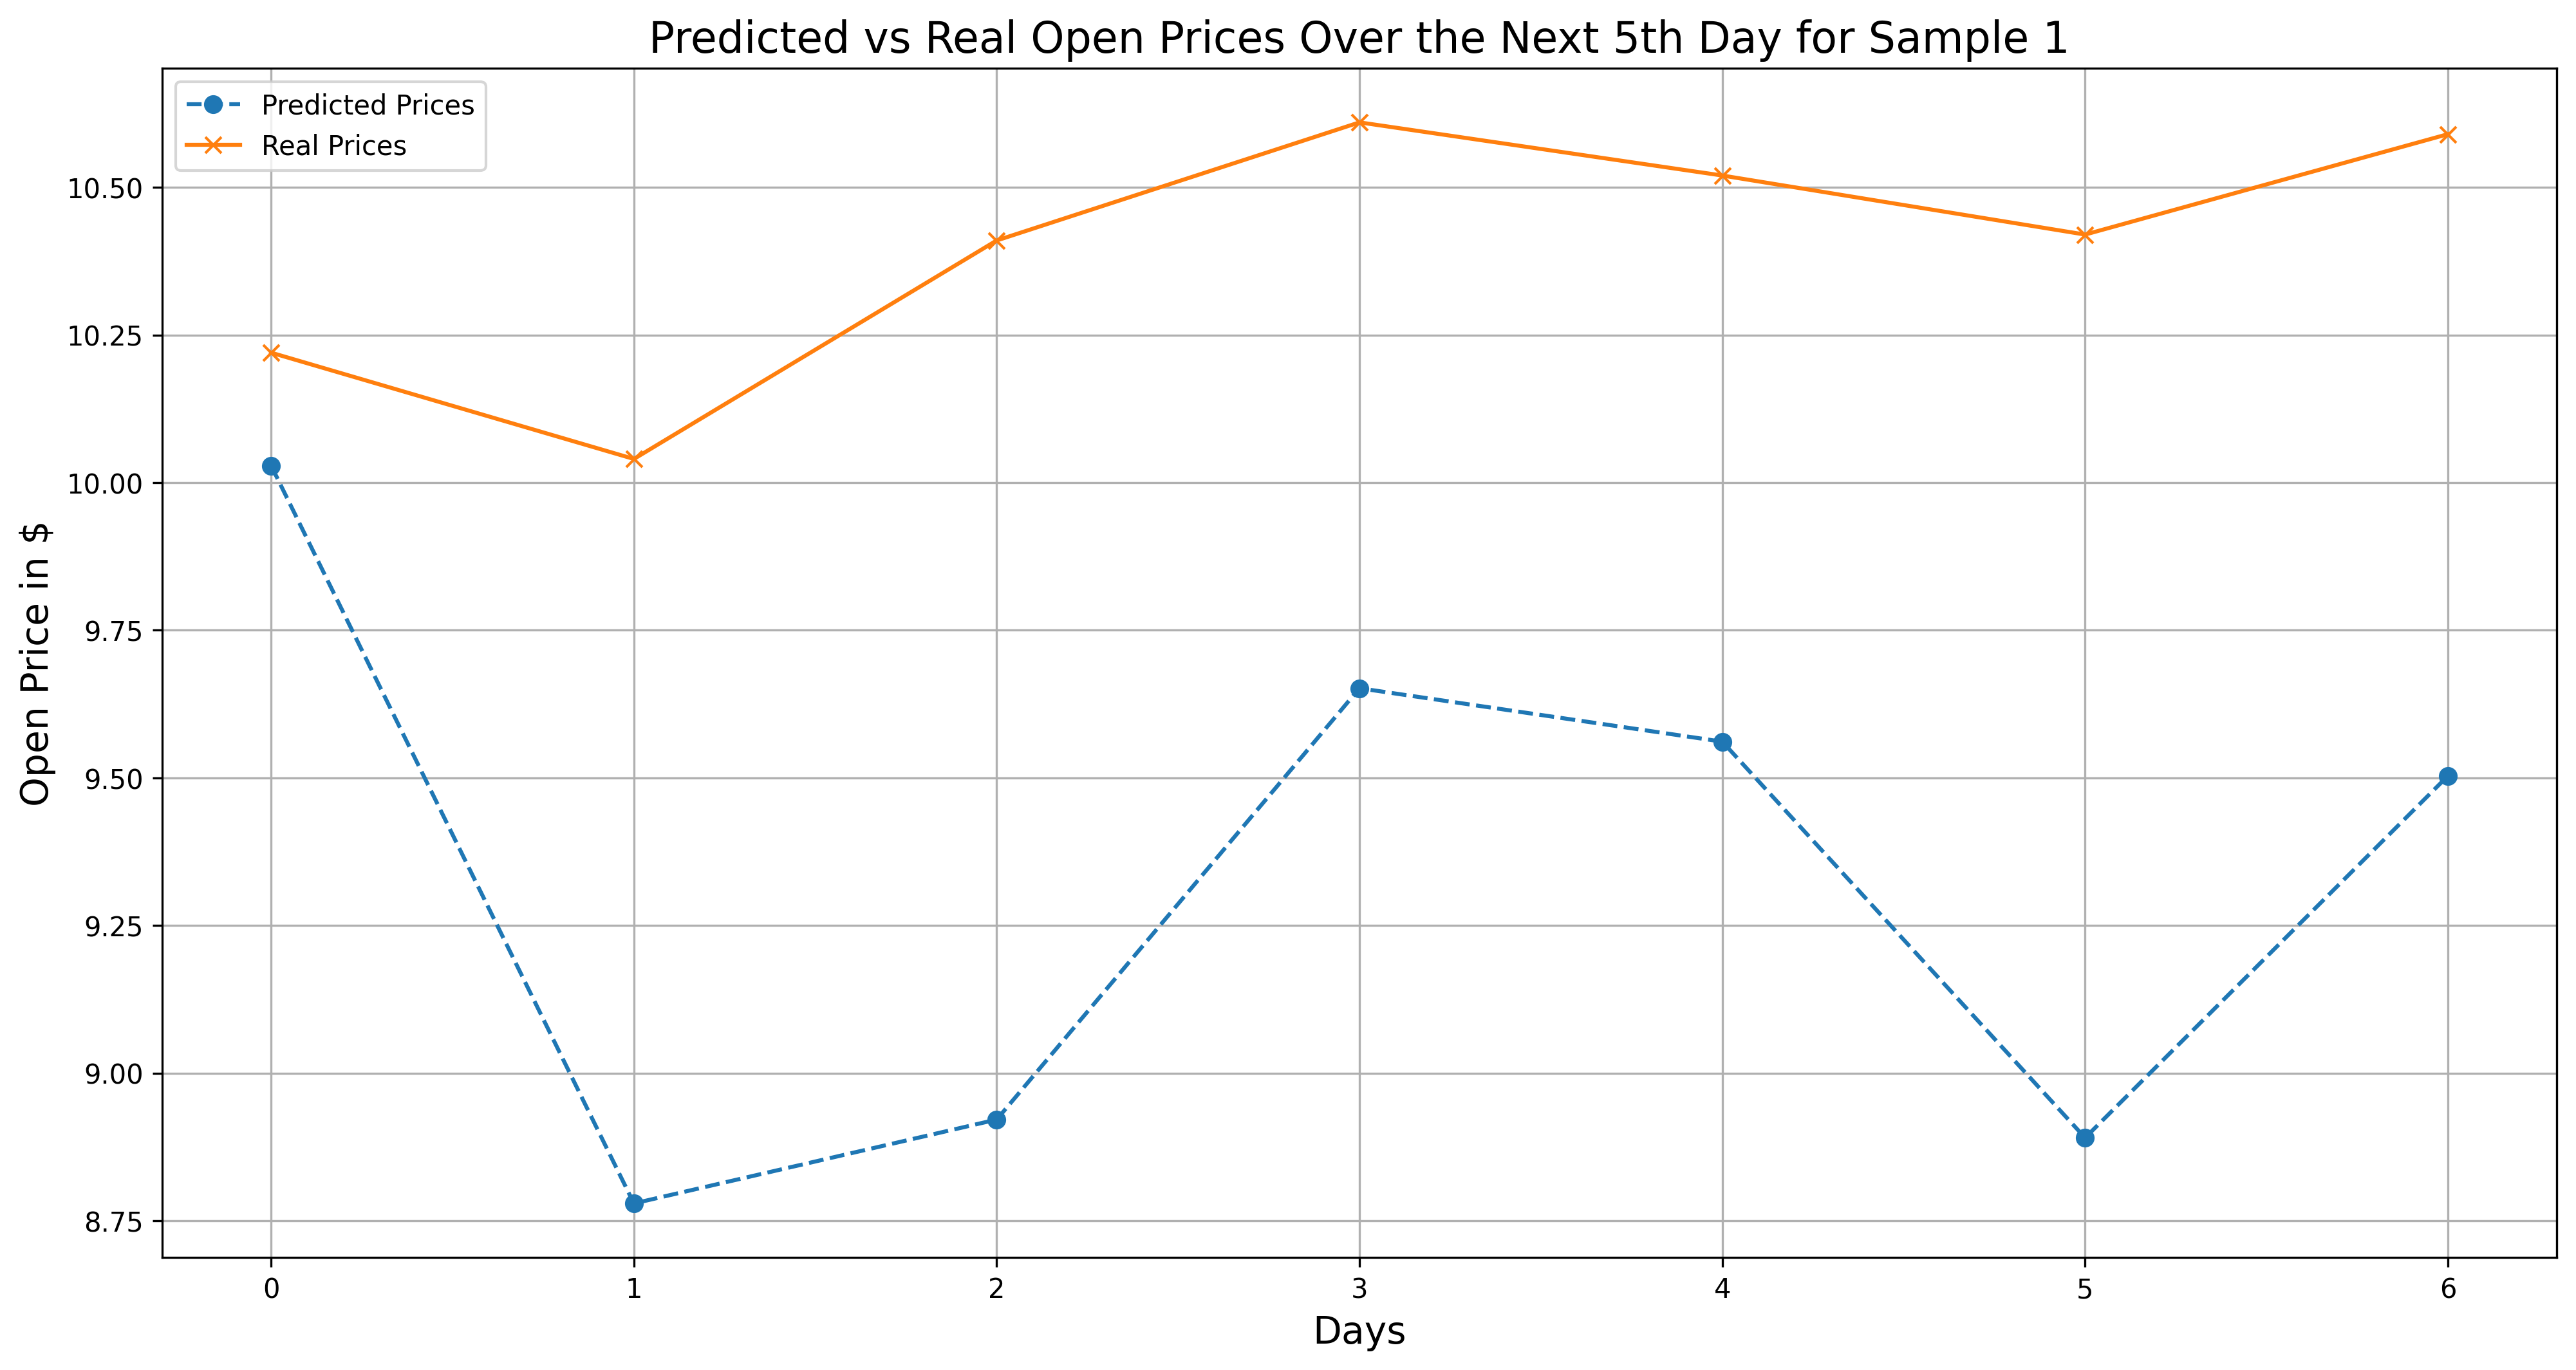

In [ ]:
plot_prediction_timestep(y_pred_denorm_1d, y_test, "Convo1D")
plot_prediction_timestep(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction_timestep(y_pred_denorm_bigru, y_test, "BiGRU")